<a href="https://colab.research.google.com/github/LosanChar/OCR-de-billetes/blob/main/OCR%20de%20billetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos las imágenes desde drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Instalamos la herramienta de tesseract y  gTTs para implementar el convetidor de texto a voz

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
!pip install gTTS

Cargamos las imagenes almacenadas en drive

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#se carga las imagenes de 20 pesos desde drive en distintas variables
i201 = cv2.imread('/content/drive/My Drive/Proyecto final/20/1.jpg')
i202 = cv2.imread('/content/drive/My Drive/Proyecto final/20/2.jpg')
i203 = cv2.imread('/content/drive/My Drive/Proyecto final/20/3.jpg')
i204 = cv2.imread('/content/drive/My Drive/Proyecto final/20/4.jpg')
i205 = cv2.imread('/content/drive/My Drive/Proyecto final/20/5.jpg')
#se carga las imagenes de 50 pesos desde drive en distintas variables
i501 = cv2.imread('/content/drive/My Drive/Proyecto final/50/50.jpg')
i502 = cv2.imread('/content/drive/My Drive/Proyecto final/50/2.jpg')
i503 = cv2.imread('/content/drive/My Drive/Proyecto final/50/3.jpg')
i504 = cv2.imread('/content/drive/My Drive/Proyecto final/50/4.jpg')
i505 = cv2.imread('/content/drive/My Drive/Proyecto final/50/5.jpg')
#se acumulan en una lista de imagenes
lista= [i201,i202,i203,i204,i205,i501,i502,i503,i504,i505]

Bancode México


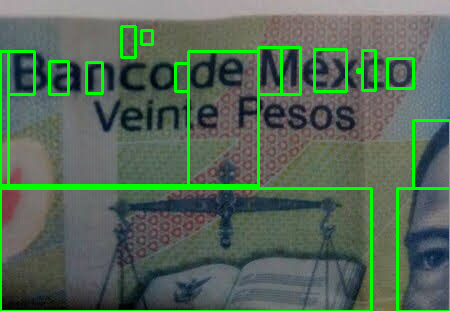

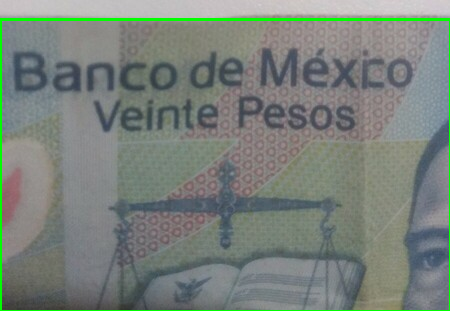

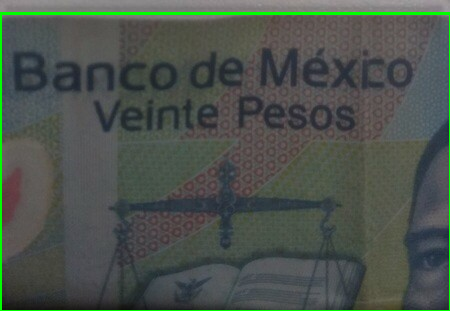

nore mos nae ?
Banco de Meéexco
_« Veinte Pesos -

é


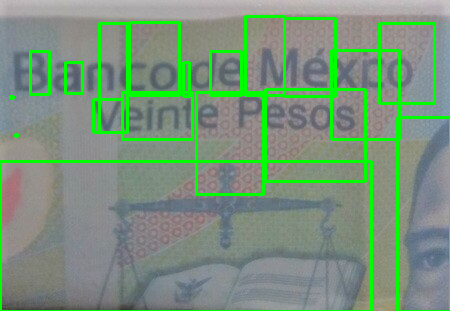

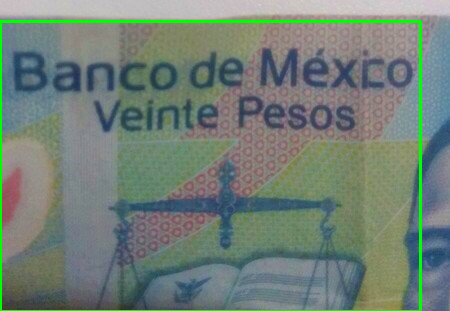

Banco de México
_ Cincuenta Pesos © ses


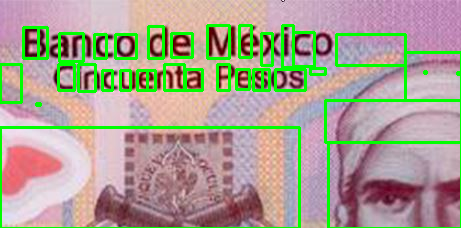

Banco de México
Cincuenta Pesos
See
sHRyeseR

tyswee .

Pi


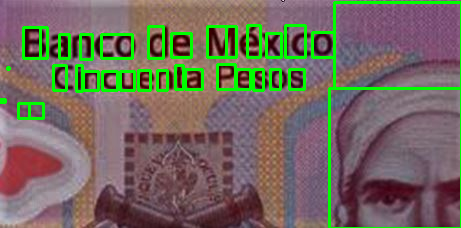

Banco de México ~
_ Cincuenta Pesos)”

. K.


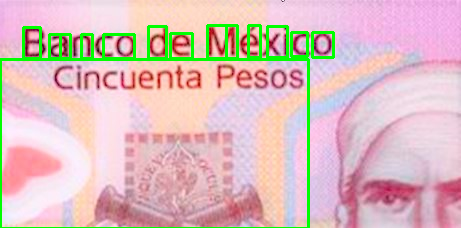

Banco de Mé "
Cc Cincuenta rg


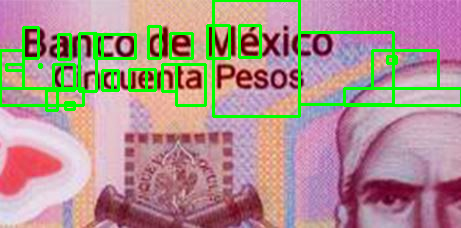

‘Banco de México

- Cincuenta Pesos A


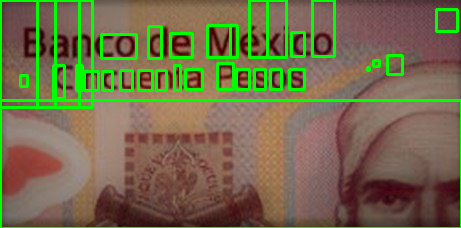

In [ ]:
import pytesseract
#linea de configuracion para el tratamiento de la imagen
#oem 1 = red neuronoal con solo lstm
#psm 4 = suponemos una sola columna de texto de tamaños variables
custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz --oem 1 --psm 4'
#recorremos la lista de imagenes
cadenas=[]
for img in lista:
  #imprimimos caracteres detectados
  res=(pytesseract.image_to_string(img, config=custom_config))
  print(res)
  #almacenamos el resultado en una lista
  cadenas.append(res)
  #calculo y dibujado de rectangulos
  h, w, c= img.shape
  boxes = pytesseract.image_to_boxes(img) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
  #imprimimos la imagen
  cv2_imshow(img)



In [ ]:
i=1
aux=[]
for cad in cadenas:
  aux.append("Resultado "+str(i)+" fue: "+cad)
  i=i+1

my_lst_str = ' \n '.join(map(str, aux)) 
print(my_lst_str)


Resultado 1 fue: Bancode México 
 Resultado 2 fue:  
 Resultado 3 fue:  
 Resultado 4 fue: nore mos nae ?
Banco de Meéexco
_« Veinte Pesos -

é 
 Resultado 5 fue:  
 Resultado 6 fue: Banco de México
_ Cincuenta Pesos © ses 
 Resultado 7 fue: Banco de México
Cincuenta Pesos
See
sHRyeseR

tyswee .

Pi 
 Resultado 8 fue: Banco de México ~
_ Cincuenta Pesos)”

. K. 
 Resultado 9 fue: Banco de Mé "
Cc Cincuenta rg 
 Resultado 10 fue: ‘Banco de México

- Cincuenta Pesos A


In [ ]:
from gtts import gTTS
from IPython.display import Audio
##cadena de lectura

tts = gTTS(my_lst_str, lang='es-us')
tts.save('1.wav')
sound_file = '1.wav'
Audio(sound_file, autoplay=True)

# Discusión

En la herramienta de tesseract podemos encontrar opciones demasiado viables que nos facilitan la labor de detectar caracteres en una imágen, sin embargo entre las deficiencias que podemos encontrar es el reconocimiento de caracteres en imagenes con variaciones, es decir si varian en cuanto a las dimesiones de la imágen, iluminación, entre otros factores. 
